# Mall Customers Segmentation

# 1. Importing libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

# For data manipulation
import numpy as np
import pandas as pd 

# For Data Visualization
%matplotlib inline
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt 
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

# Machine Learning
from sklearn.cluster import KMeans

# 2. Loading Data

In [2]:
data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data.shape

(200, 5)

# 3. Data Preprocessing

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


There is no missing values

In [5]:
data.columns = ['ID', 'Gender', 'Age', 'Annual Income', 'Spending Score']
data.head()

,ID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# 4. Analysis and Visualization  

### Now we will study the correlation between gender and other features

In [6]:
data.describe()

,ID,Age,Annual Income,Spending Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
print('highest Spending Score: ')
data[data['Spending Score'] == 99]

highest Spending Score: 


,ID,Gender,Age,Annual Income,Spending Score
11,12,Female,35,19,99


In [8]:
print('Lowest Spending Score: ')
data[data['Spending Score'] == 1]

Lowest Spending Score: 


,ID,Gender,Age,Annual Income,Spending Score
156,157,Male,37,78,1
158,159,Male,34,78,1


In [9]:
print('Highest Annual Income: ')
data[data['Annual Income'] == 137]

Highest Annual Income: 


,ID,Gender,Age,Annual Income,Spending Score
198,199,Male,32,137,18
199,200,Male,30,137,83


In [10]:
print('Lowest Annual Income: ')
data[data['Annual Income'] == 15]

Lowest Annual Income: 


,ID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81


Conclusion : 
- The oldest customer is 70 years old and the youngest one is 13
- Mean Age is 39

- The customer with the highest spending score is female and the score is 99
- The customer with the lowest spending score is two males and the score is 1
- Mean Spending Score 50.2	

- The customer with the highest Annual Income is two males and the score is 137 K$
- The customer with the lowest spending score is two males and the score is 15 k$
- Mean Annual Income 65.5 K$

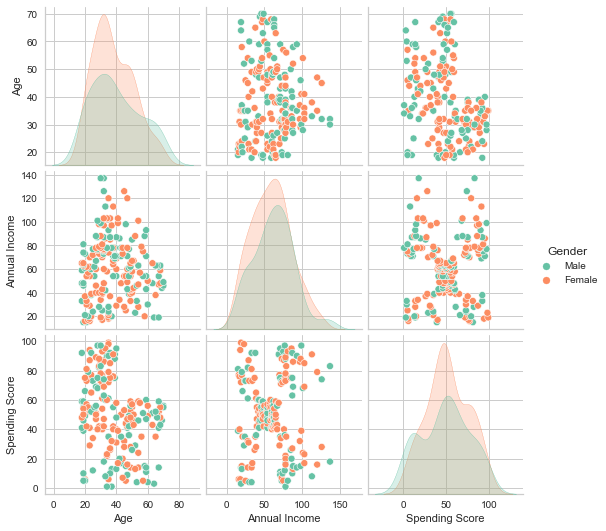

In [11]:
grid = sns.pairplot(data.drop('ID', axis = 1), hue = 'Gender', palette='Set2')

Conclusion :
- `Age`, `Annual Income` and `Spending Score` features are multimodal distributions each having about two
- `Annual Income` and `Spending Score` plot seems to be formed to 5 clusters

## Gender

In [12]:
counts = data['Gender'].value_counts()
counts

Female    112
Male       88
Name: Gender, dtype: int64

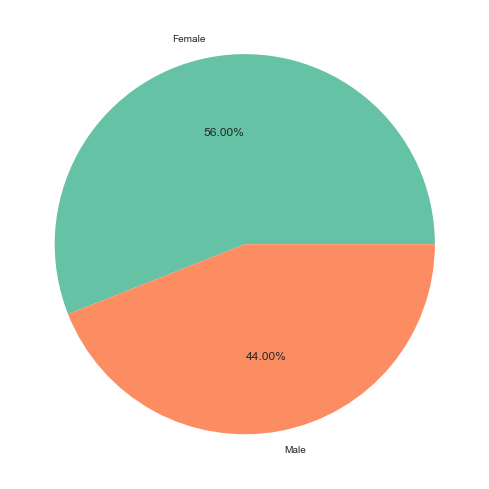

In [13]:
fig = plt.figure()
ax = fig.add_axes([0,0,1.2,1.2])
colors = sns.color_palette('Set2')[:2]

ax.pie(counts, labels = counts.index,colors = colors ,autopct='%1.2f%%')
plt.show()

In [14]:
data.groupby('Gender')['Annual Income'].mean()

Gender
Female    59.250000
Male      62.227273
Name: Annual Income, dtype: float64

<AxesSubplot:xlabel='Gender', ylabel='Annual Income'>

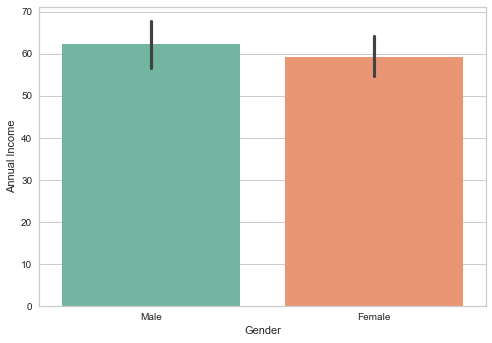

In [15]:
sns.barplot(data = data, x = 'Gender', y = 'Annual Income', palette='Set2', estimator=np.mean)

In [16]:
data.groupby('Gender')['Spending Score'].mean()

Gender
Female    51.526786
Male      48.511364
Name: Spending Score, dtype: float64

<AxesSubplot:xlabel='Gender', ylabel='Spending Score'>

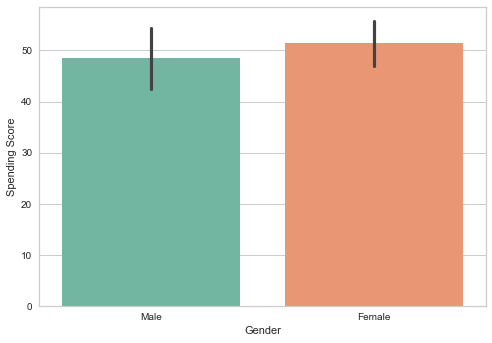

In [17]:
sns.barplot(data = data, x = 'Gender', y = 'Spending Score', palette='Set2')

In [18]:
spendings = data.groupby('Gender')['Spending Score'].sum()
spendings

Gender
Female    5771
Male      4269
Name: Spending Score, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='Spending Score'>

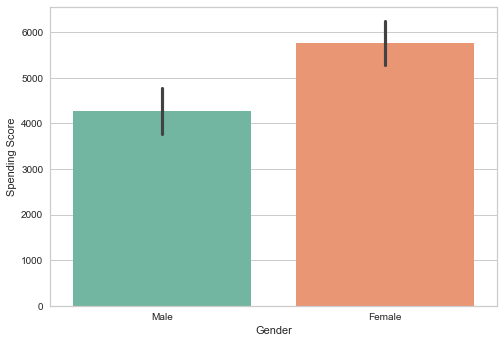

In [19]:
sns.barplot(data = data, x = 'Gender', y = 'Spending Score', palette='Set2', estimator = np.sum)

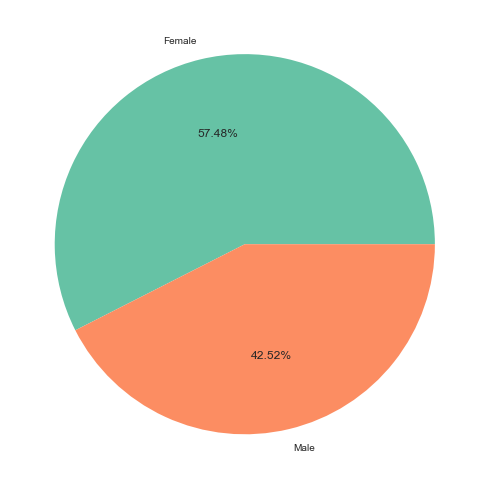

In [20]:
fig = plt.figure()
ax = fig.add_axes([0,0,1.2,1.2])
colors = sns.color_palette('Set2')[:2]

ax.pie(spendings, labels = spendings.index,colors = colors ,autopct='%1.2f%%')
plt.show()

Conclusion:
- `Females` are more than `Males` 6%
- The average annual income of males (62.2 K$) more than females (59.2 K$)
- The average spending score og males (48.5) less than females (51.5)
- The total spending score of female (57.48%) more than male (42.52%)

## Age

In [21]:
# Convert Age to groups
for i in range(10, 80, 10):
    data.loc[ (data['Age'] >= i) & (data['Age'] <= i+10) , 'Age_group' ] = str(i) + 's'

data.head()

,ID,Gender,Age,Annual Income,Spending Score,Age_group
0,1,Male,19,15,39,10s
1,2,Male,21,15,81,20s
2,3,Female,20,16,6,20s
3,4,Female,23,16,77,20s
4,5,Female,31,17,40,30s


<AxesSubplot:xlabel='Age_group', ylabel='count'>

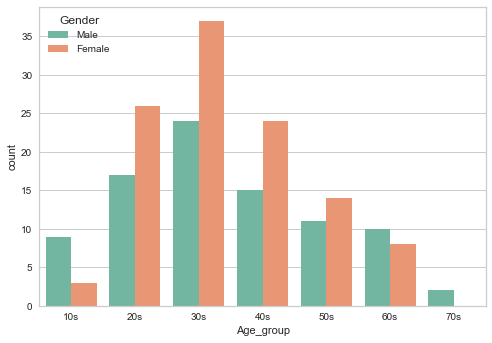

In [22]:
sns.countplot(data=data, x='Age_group' , hue='Gender', palette='Set2', order =['10s', '20s', '30s', '40s', '50s', '60s', '70s'])

In [23]:
pd.DataFrame(data.groupby('Age_group')['Annual Income'].mean())

,Annual Income
Age_group,
10s,55.083333
20s,51.837209
30s,70.180328
40s,63.948718
50s,58.680000
60s,49.166667
70s,47.500000


<AxesSubplot:xlabel='Age_group', ylabel='Annual Income'>

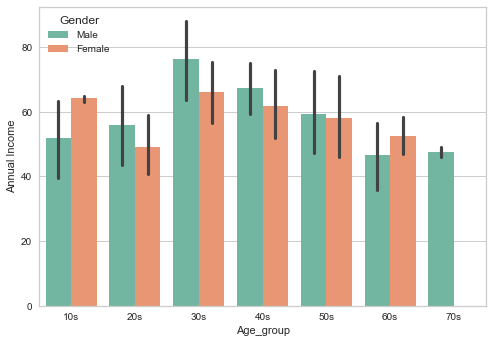

In [24]:
sns.barplot(data=data, x='Age_group', y='Annual Income', estimator=np.mean, hue = 'Gender', palette='Set2', order =['10s', '20s', '30s', '40s', '50s', '60s', '70s'])

In [25]:
pd.DataFrame(data.groupby('Age_group')['Spending Score'].mean())

,Spending Score
Age_group,
10s,46.500000
20s,61.953488
30s,61.098361
40s,34.948718
50s,34.720000
60s,41.611111
70s,55.500000


<AxesSubplot:xlabel='Age_group', ylabel='Spending Score'>

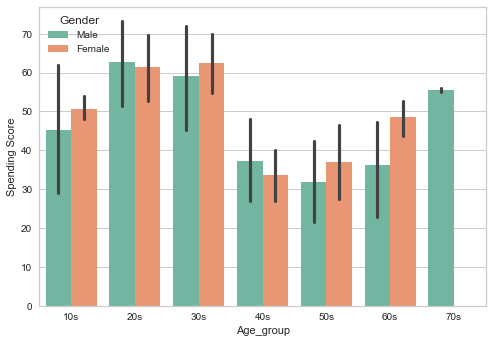

In [26]:
sns.barplot(data=data, x='Age_group', y='Spending Score', hue = 'Gender', palette='Set2', order =['10s', '20s', '30s', '40s', '50s', '60s', '70s'])

Conclusion :
- 20s, 30s are the most common ages groups amoung customers
- 30s have the highest average annual income (70 K$)
- 20s, 30s have the highest spending score (61.95) and (61.09)

## Annual Income

<AxesSubplot:xlabel='Annual Income', ylabel='Count'>

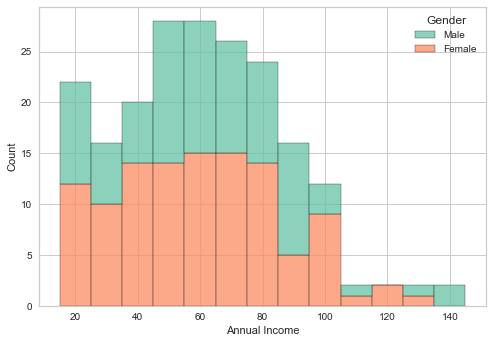

In [27]:
sns.histplot(data=data, x='Annual Income', hue='Gender', binwidth=10, multiple='stack', palette='Set2')

Conclusion : 
- Most of customers earn between 50k$ and 80k$ annually
- Many customers earns 20k$ only

## Spending Score


<AxesSubplot:xlabel='Spending Score', ylabel='Count'>

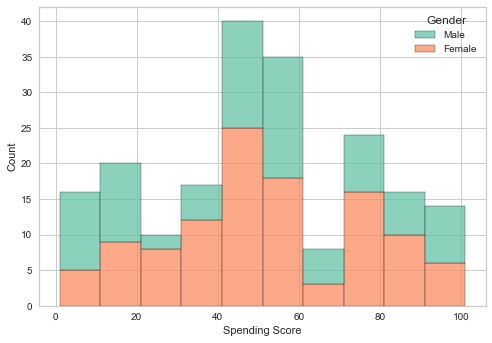

In [28]:
sns.histplot(data=data, x='Spending Score', hue='Gender', binwidth=10, multiple='stack', palette='Set2')

Conclusion : 
- From 40 to 60 are the most spending scores
- Females spend more than males
- From 0 to 20 males spend more than females

<AxesSubplot:xlabel='Spending Score', ylabel='Annual Income'>

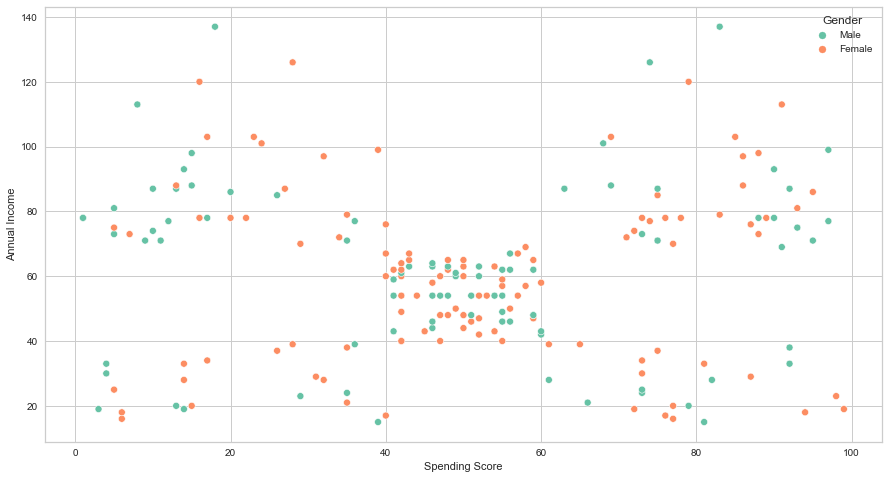

In [29]:
plt.figure(figsize=(15, 8))
sns.scatterplot(data = data,  x='Spending Score', y='Annual Income', hue='Gender', palette='Set2')

`Annual Income` and `Spending Score` plot seems to be formed to 5 clusters
- High income, Low spending score
- High income, High spending score
- Low income, Low spending score
- Low income, High spending score
- Middle income, Middle spending score


# 5. Modeling

## 5.1 Prepare Data for modeling

In [30]:
data['Gender'].loc[ data['Gender'] == 'Female' ] = 0
data['Gender'].loc[ data['Gender'] == 'Male' ] = 1
data

,ID,Gender,Age,Annual Income,Spending Score,Age_group
0,1,1,19,15,39,10s
1,2,1,21,15,81,20s
2,3,0,20,16,6,20s
3,4,0,23,16,77,20s
4,5,0,31,17,40,30s
...,...,...,...,...,...,...
195,196,0,35,120,79,30s
196,197,0,45,126,28,40s
197,198,1,32,126,74,30s
198,199,1,32,137,18,30s


In [31]:
data.drop(['ID', 'Age_group'], axis = 1, inplace=True)
data

,Gender,Age,Annual Income,Spending Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


## 5.2 Explore models

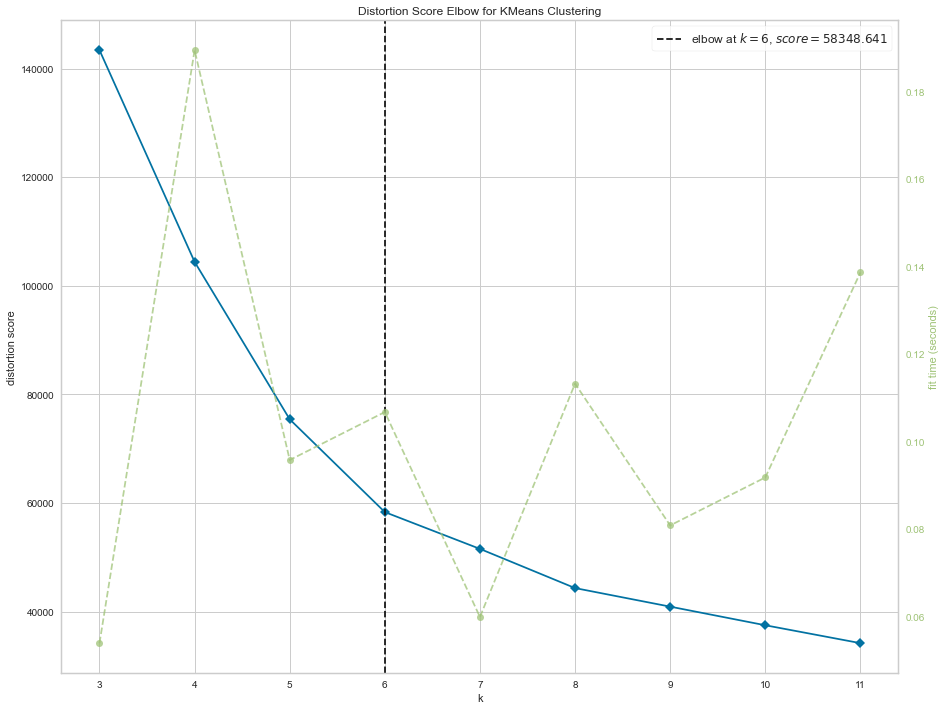

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [32]:
kmean_model = KMeans(random_state=42)

plt.figure(figsize=(15, 12))
elbow_visualizer = KElbowVisualizer(kmean_model, k=(3, 12))
elbow_visualizer.fit(data)
elbow_visualizer.show()

<AxesSubplot:xlabel='Spending Score', ylabel='Annual Income'>

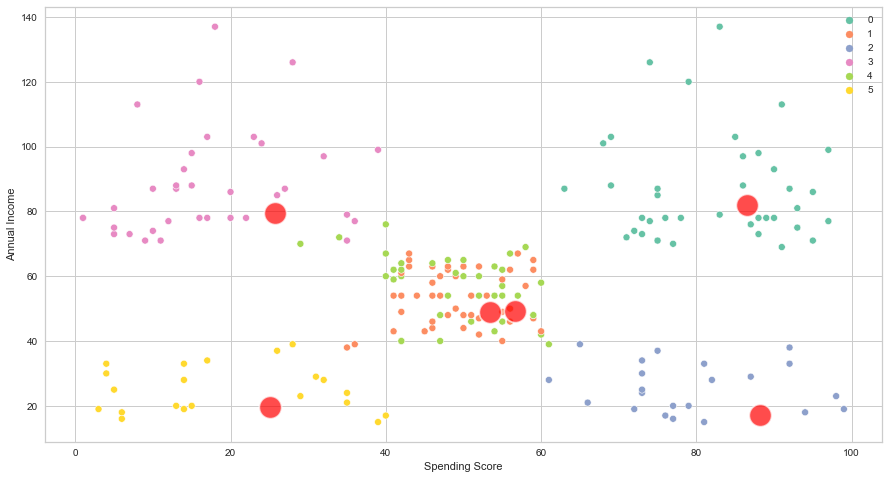

In [33]:
kmean_model.n_clusters = 6
kmean_model.fit(data)

kmean_clusters = kmean_model.labels_
kmean_centroids = kmean_model.cluster_centers_

plt.figure(figsize=(15, 8))

sns.scatterplot(data=data, x='Spending Score', y='Annual Income', hue=kmean_clusters, palette='Set2')
sns.scatterplot(x=kmean_centroids[:, 2], y=kmean_centroids[:, 3], color='red', s=500, alpha=0.7)

In [34]:
fig = px.scatter_3d(
    data,
    x='Age', 
    y='Spending Score', 
    z='Annual Income', 
    color=kmean_clusters.astype(str),
    opacity=0.8,
    height=700,
    width=700,
    title='Clusters in Age-SpendingScore-Income space',
    color_discrete_sequence=px.colors.qualitative.Set2
)
fig.show()

In [35]:
fig = px.scatter_3d(
    data,
    x='Gender', 
    y='Spending Score', 
    z='Annual Income', 
    color=kmean_clusters.astype(str),
    opacity=0.8,
    height=700,
    width=700,
    title='Clusters in Age-SpendingScore-Income space',
    color_discrete_sequence=px.colors.qualitative.Set2
)
fig.show()

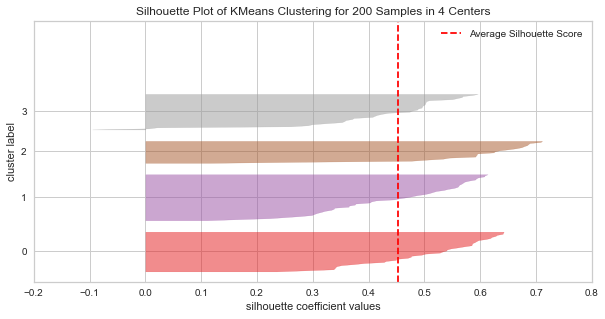

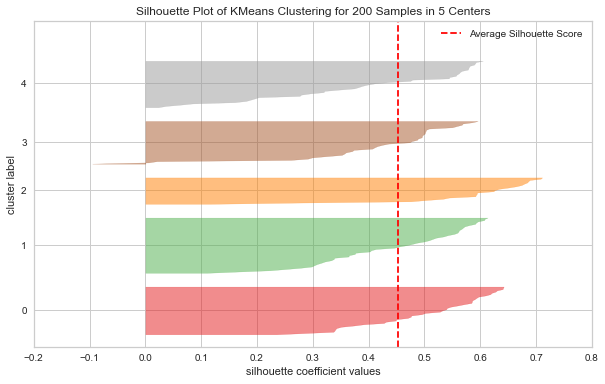

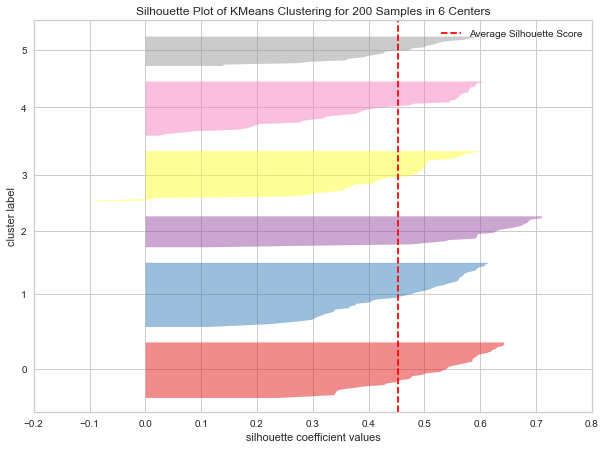

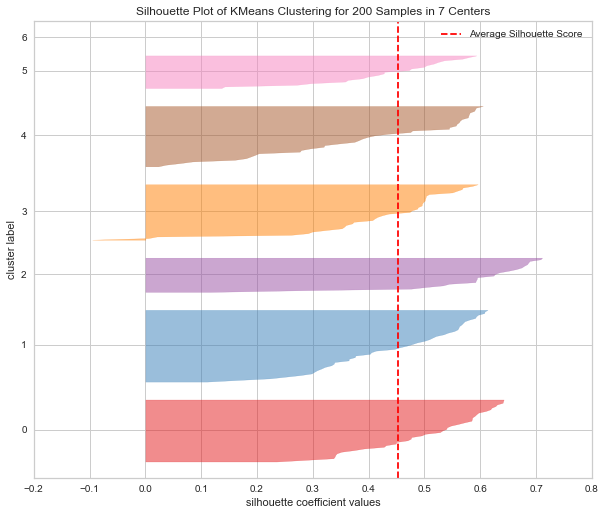

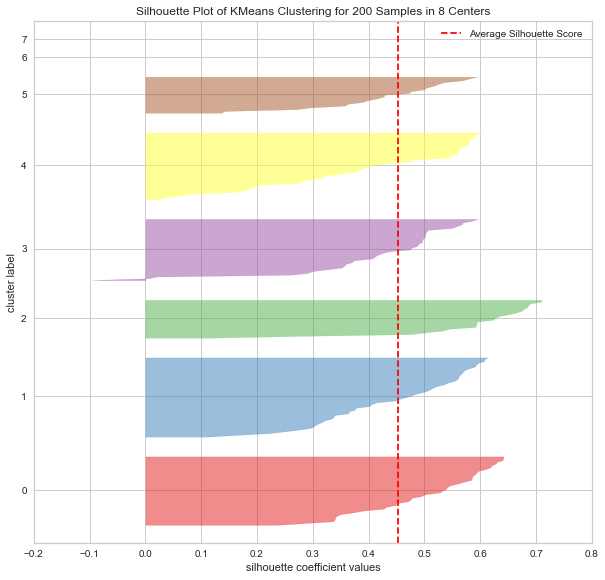

In [36]:
for idx, n_clusters in enumerate([4, 5, 6, 7, 8]):
    plt.figure(figsize=(10, n_clusters * 1.2))
    
    kmean_model.n_clusters = n_clusters
    silhouette_visualizer = SilhouetteVisualizer(kmean_model)

    silhouette_visualizer.fit(data)
    silhouette_visualizer.show()

From analysis, Visualizing and silhouette plots 6 cluster is the best choice

In [37]:
data['Cluster'] = kmean_clusters

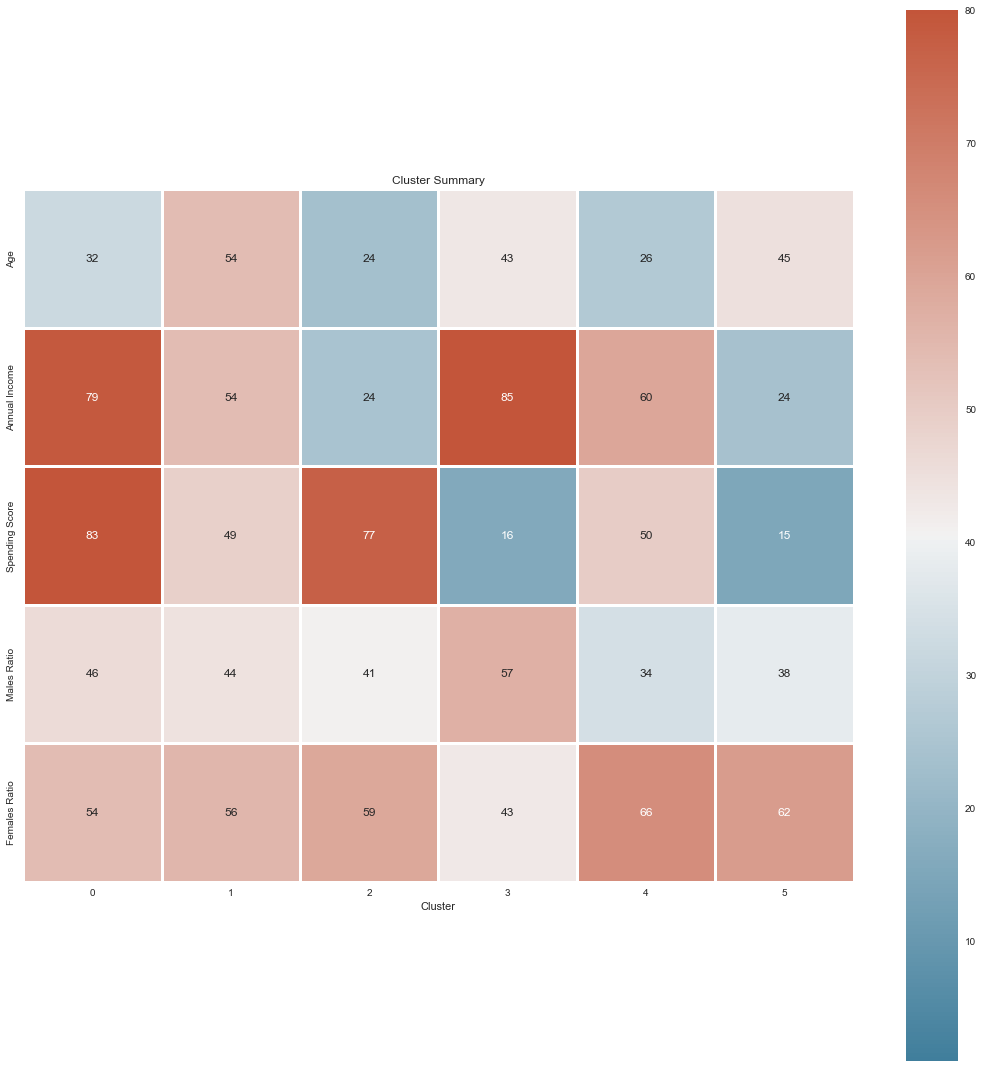

In [38]:
heatcmap = sns.diverging_palette(230, 20, as_cmap=True)
fig, ax = plt.subplots(1, 1, figsize=(15, 15))


cluster_heatmap = data.groupby(['Cluster'])[['Age', 'Annual Income', 'Spending Score']].median()
cluster_heatmap['Males Ratio'] = data[data['Gender'] == 1].groupby(['Cluster']).count()['Gender'] / data.groupby(['Cluster']).count()['Gender'] * 100
cluster_heatmap['Females Ratio'] = data[data['Gender'] == 0].groupby(['Cluster']).count()['Gender'] / data.groupby(['Cluster']).count()['Gender'] * 100

sns.heatmap(cluster_heatmap.T, 
    square=True,
    linewidth=3,
    vmax=80, 
    vmin=1,
    cmap=heatcmap,
    annot=True,
    ax=ax,
)

ax.set_title('Cluster Summary')
plt.tight_layout()

# 6. Summary

- Cluster 0 : High `Spending Score`, High `Annual Income`, Middle `Ages`, 54% `Females` and 46% `Males`
- Cluster 1 : Middle `Spending Score`, Middle `Annual Income`, Middle `Ages`, 56% `Females` and 44% `Males`
- Cluster 2 : High `Spending Score`, Low `Annual Income`, Low `Ages`, 59% `Females` and 41% `Males`
- Cluster 3 : Low `Spending Score`, High `Annual Income`, Middle `Ages`, 43% `Females` and 57% `Males`
- Cluster 4 : Middle `Spending Score`, Upper-Middle `Annual Income`, Low `Ages`, 66% `Females` and 34% `Males`
- Cluster 5 : Low `Spending Score`, Low `Annual Income`, Middle `Ages`, 62% `Females` and 36% `Males`